In [ ]:
pip install pyaudio

In [ ]:
pip install numpy

In [ ]:
pip install pydub

In [ ]:
pip install --upgrade pip setuptools wheel

In [ ]:
pip install webrtcvad

In [ ]:
pip install soundfile

In [ ]:
pip install tk

In [ ]:
pip install pillow

In [ ]:
pip install opencv-python==4.5.5.64

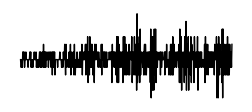

In [1]:
import tkinter as tk
import threading
import numpy as np
import webrtcvad
import pyaudio
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Initialize main window
root = tk.Tk()
root.title("Real-Time Speech Detection")
root.geometry("870x600")

# Function to load the image
def load_image(file_path):
    return Image.open(file_path)

# Load background images for speech detected and no speech
bg_speech = load_image(r"C:\Users\allei\Downloads\Teus_Habla.jpg")  # Replace with actual file path
bg_no_speech = load_image(r"C:\Users\allei\Downloads\Teus_no_habla.jpg")  # Replace with actual file path

# Resize images to fit the window size (870x600)
bg_speech_resized = bg_speech.resize((870, 600))
bg_no_speech_resized = bg_no_speech.resize((870, 600))

# Convert images to Tkinter compatible format and store as global variables
bg_speech_tk = ImageTk.PhotoImage(bg_speech_resized)
bg_no_speech_tk = ImageTk.PhotoImage(bg_no_speech_resized)

# Initialize label for video
video_label = tk.Label(root, image=bg_no_speech_tk)
video_label.place(x=0, y=0, relwidth=1, relheight=1)

# Keep a reference to the image to prevent it from being garbage collected
video_label.image = bg_no_speech_tk

# Matplotlib figure for signal graph
fig, ax = plt.subplots(figsize=(3, 1.2), facecolor="white")  # Graph is now smaller
canvas_plot = FigureCanvasTkAgg(fig, master=root)

# Position the graph (Adjusted)
canvas_plot.get_tk_widget().place(x=280, y=392)  # Moved up

# Text label for speech detection
label = tk.Label(root, text="No speech detected", font=("Montserrat", 16), fg="black", bg="white")
label.place(x=350, y=375)  # ADJUST HERE

# WebRTC VAD setup
vad = webrtcvad.Vad()
vad.set_mode(3)  # Sensitivity level (0-3)

# PyAudio setup
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000  # Sample rate
FRAME_DURATION = 30  # Frame duration in ms
FRAME_SIZE = int(RATE * FRAME_DURATION / 1000)  # Number of samples per frame

audio = pyaudio.PyAudio()
stream = audio.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, frames_per_buffer=FRAME_SIZE)

# Frame counter
frame_counter = 0
frame_update_interval = 4  # Update UI every 5 frames

# Function to update the background image
def update_background(is_speech):
    current_bg = bg_speech_tk if is_speech else bg_no_speech_tk
    video_label.config(image=current_bg)
    video_label.image = current_bg  # Keep reference

# Start with no speech background
update_background(False)

def process_audio():
    """Reads audio in real-time and updates the UI."""
    global frame_counter
    while True:
        data = stream.read(FRAME_SIZE, exception_on_overflow=False)
        audio_samples = np.frombuffer(data, dtype=np.int16)

        # Detect speech
        is_speech = vad.is_speech(data, RATE)

        # Increment the frame counter
        frame_counter += 1

        # Update UI every frame_update_interval frames
        if frame_counter >= frame_update_interval:
            frame_counter = 0  # Reset counter
            root.after(0, update_ui, is_speech, audio_samples)

def update_ui(is_speech, audio_samples):
    """Updates the UI based on speech detection."""
    # Update the background image based on speech detection
    update_background(is_speech)

    # Update the speech detection label
    label.config(
        text="Speech Detected!" if is_speech else "No Speech Detected",
        fg="black"
    )
    
    # Update the live signal plot
    update_signal_plot(audio_samples)

def update_signal_plot(audio_samples):
    """Updates the live signal plot."""
    ax.clear()  # Clear the previous plot
    ax.plot(audio_samples, color="black", linewidth=1)  # Plot the raw, un-normalized signal

    # White background and outline for graph
    ax.set_facecolor("white")
    for spine in ax.spines.values():
        spine.set_color("white")

    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

    canvas_plot.draw()  # Refresh the plot to show the new data

# Start audio processing in a separate thread
audio_thread = threading.Thread(target=process_audio, daemon=True)
audio_thread.start()

# Start UI loop
root.mainloop()

In [ ]:
import webrtcvad
from pydub import AudioSegment
import soundfile as sf
import numpy as np

def argu (audio,duracion,rate):
  tamano=int((duracion*rate)/1000)
  for i in range (0,len(audio),tamano):
    yield(audio[i:i+tamano])

def montse (wav,nivel):
  vad= webrtcvad.Vad(nivel)
  audio,rate=sf.read(wav,dtype="int16")
  frames=argu(audio,duracion=30,rate=rate)

  segmentos=[]

  for i,frame in enumerate(frames):
    is_speech=vad.is_speech(frame.tobytes(),rate);
    if is_speech:
      segmentos.append(frame)
    return is_speech

cont=0;
for i in range (1,562):
    if i<10:
        num= r"C:\Users\allei\OneDrive\Documents\6to Semestre\Procesamiento de señales\Con_ruido\Con_voz_no_codificados\20%\CV_Sucio0000" + str(i) +'_ruido_20pc.wav';
    elif i<100:
        num= r"C:\Users\allei\OneDrive\Documents\6to Semestre\Procesamiento de señales\Con_ruido\Con_voz_no_codificados\20%\CV_Sucio000" + str(i) +'_ruido_20pc.wav';
    else:
        num= r"C:\Users\allei\OneDrive\Documents\6to Semestre\Procesamiento de señales\Con_ruido\Con_voz_no_codificados\20%\CV_Sucio00" + str(i) +'_ruido_20pc.wav';

    resp = montse(num, 0);

    if resp == True:
      cont= cont + 1;

print("Audios limpios, con voz, 0% ruido")
print("Audios correctos: " + str(cont));

In [ ]:
pip install librosa

In [ ]:
import webrtcvad
import soundfile as sf
import numpy as np
import librosa
import os

# Function to convert audio to 16-bit PCM and 16kHz if needed
def convert_audio(input_file, target_sr=16000):
    y, sr = librosa.load(input_file, sr=None, mono=True)  # Load with original sample rate
    if sr != target_sr:
        y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)  # Resample to 16kHz if needed

    # Ensure 16-bit PCM format
    y = (y * 32767).astype(np.int16)  # Convert float (-1 to 1) to int16 (-32768 to 32767)
    
    return y, target_sr

# Function to split audio into frames for WebRTC VAD
def frame_generator(audio, rate, frame_ms=30):
    frame_size = int(rate * frame_ms / 1000)  # Frame size in samples
    for i in range(0, len(audio) - frame_size + 1, frame_size):
        yield audio[i:i + frame_size]

# Function to process the audio with WebRTC VAD
def montse(wav, vad_level=0):
    vad = webrtcvad.Vad(vad_level)

    # Check if file exists
    if not os.path.exists(wav):
        print(f"File not found: {wav}")
        return False  

    # Convert audio to 16-bit PCM and 16kHz
    try:
        audio, rate = convert_audio(wav, target_sr=16000)
    except Exception as e:
        print(f"Error reading file {wav}: {e}")
        return False

    frames = list(frame_generator(audio, rate, frame_ms=30))

    # Count frames detected as speech
    speech_frames = sum(1 for frame in frames if vad.is_speech(frame.tobytes(), rate))
    total_frames = len(frames)
    
    # Calculate speech percentage
    speech_percentage = (speech_frames / total_frames) * 100 if total_frames > 0 else 0

    return speech_frames > 0  # Return True if speech is detected, False otherwise

# Counter for non-speech audio files
clean_count = 0
total_files = 0

# Process all files
for i in range(1, 562):
    num= r"C:\Users\allei\Downloads\ESC-50-master\ESC-50-master\audio\Audio (" + str(i) +').wav'
    
    total_files += 1
    has_speech = montse(num, vad_level=3)  # Use VAD level 0 for strict detection

    if not has_speech:  # If no speech is detected, count as clean
        clean_count += 1

print("\nFinal Summary:")
print(f"Total audios detected: {clean_count} out of {total_files}")

